In [118]:
import pandas as pd
import numpy as np

In [119]:
df_tc = pd.read_csv('./data/trash_collect.csv')

In [120]:
df_tc['recollect'].unique()

array(['T', 'F5', 'TH5', 'M', 'MTH', 'F', 'TF', 'TH', 'MF', 'W1A', 'W',
       nan, 'W5', 'T5'], dtype=object)

In [121]:
df_tc['trashday'].unique()

array(['T', 'F', 'TH', 'M', 'MTH', 'TF', 'MF', 'W', nan], dtype=object)

In [122]:
freq_dict = {'T':1,
 'F5':0.2, 
 'TH5':0.2,
 'M':1,
 'MTH':2, 
 'F':1, 
 'TF':2, 
 'TH':1, 
 'MF':2, 
 'W':1, 
 'W5':0.2, 
 'T5':0.2}

        

In [123]:
df_tc = df_tc[df_tc['recollect'] != 'W1A']
df_tc = df_tc[df_tc['trashday'] != 'W1A']
df_tc = df_tc[df_tc['recollect'].isna() == False]
df_tc = df_tc[df_tc['trashday'].isna() == False]

In [124]:
# df_tc['recollect_freq'] = df_tc['recollect'].apply(lambda x: freq_dict[x])
# df_tc['trashday_freq'] = df_tc['trashday'].apply(lambda x: freq_dict[x])

In [125]:
recollect_raw = df_tc.groupby('zip_code').aggregate(lambda x:x)['recollect']
trashday_raw = df_tc.groupby('zip_code').aggregate(lambda x:x)['trashday']

/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_3840/387048178.py:1: FutureWarning: ['sam_address_id', 'x_coord', 'y_coord'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  recollect_raw = df_tc.groupby('zip_code').aggregate(lambda x:x)['recollect']
/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_3840/387048178.py:2: FutureWarning: ['sam_address_id', 'x_coord', 'y_coord'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  trashday_raw = df_tc.groupby('zip_code').aggregate(lambda x:x)['trashday']


In [126]:
recollect_raw

zip_code
2108.0    [MF, MF, MF, MF, MF, MF, MF, MF, MF, MF, MF, M...
2109.0    [MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, ...
2110.0    [MF, MF, MF, MTH, MF, MF, MTH, MTH, MTH, MTH, ...
2111.0    [MF, MF, MF, MF, MF, MF, MF, MF, MF, MF, MF, M...
2113.0    [MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, ...
2114.0    [MF, MF, MF, MF, MF, MF, MF, MF, MF, MF, MF, M...
2115.0    [MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, ...
2116.0    [TF, TF, TF, TF, TF, TF, TF, TF, TF, TF, TF, T...
2118.0    [TF, TF, TF, TF, TF, TF, TF, TF, TF, TF, TF, T...
2119.0    [MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, ...
2120.0    [TF, TF, TF, TF, TF, TF, TF, TF, TF, TF, TF, T...
2121.0    [MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, MTH, ...
2122.0    [F, F, F, F, W, W, W, W, W, W, W, W, W, W, W, ...
2124.0    [M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, ...
2125.0    [W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, ...
2126.0    [W, W, W, W, W, W, W, TH, TH, TH, M, M, M, M, ...
2127.0    [F5, F5, F5, F5, F5, 

In [127]:
years = ['2023',
 '2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011']
df_311 = pd.concat([pd.read_csv('./data/311_service_requests_' + year + '.csv') for year in years])

/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_3840/2674498602.py:14: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_311 = pd.concat([pd.read_csv('./data/311_service_requests_' + year + '.csv') for year in years])
/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_3840/2674498602.py:14: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_311 = pd.concat([pd.read_csv('./data/311_service_requests_' + year + '.csv') for year in years])


In [128]:
df_311['case_status'].unique()

array(['Open', 'Closed'], dtype=object)

In [129]:
df_311 = df_311[(df_311['closure_reason'] != ' ') | (df_311['case_status'] == 'Open')]
df_311 = df_311[(df_311['closure_reason'] != 'Case Closed Case Noted    ') | (df_311['case_status'] == 'Open')]
df_311 = df_311[((df_311['closed_dt'].notna()) &  (df_311['closure_reason'].notna()))  | (df_311['case_status'] == 'Open')]


In [130]:
df_311['case_status'].unique()

array(['Open', 'Closed'], dtype=object)

In [131]:
df_311 = df_311[df_311['location_zipcode'].isna() == False]

In [132]:
df_311['case_status'].unique()

array(['Open', 'Closed'], dtype=object)

In [133]:
df_311 = df_311[(df_311['reason'] == 'Street Cleaning') | (df_311['reason'] == 'Sanitation')]

In [134]:
df_311['case_status'].unique()

array(['Open', 'Closed'], dtype=object)

In [135]:
df_311

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
2,101004740172,2023-03-16 13:44:00,NaN,NaN,ONTIME,Open,,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,C11,Dorchester,8,Ward 15,1504,6 Wilkinson Park,2122.0,42.3071,-71.0610,Constituent Call
9,101004740185,2023-03-16 13:53:55,NaN,NaN,ONTIME,Open,,Schedule Bulk Item Pickup,Public Works Department,Sanitation,...,B3,Greater Mattapan,9,Ward 14,1413,36 Jones Ave,2124.0,42.2862,-71.0831,Self Service
20,101004617734,2023-01-03 11:39:59,NaN,2023-01-03 11:41:10,ONTIME,Closed,Case Closed. Closed date : 2023-01-03 11:41:10...,Mattress Pickup,Public Works Department,Sanitation,...,A1,Downtown / Financial District,3,Ward 3,0302,33 Charter St,2113.0,42.3669,-71.0537,Constituent Call
22,101004617139,2023-01-03 04:31:37,2023-01-04 08:30:00,2023-01-03 05:23:21,ONTIME,Closed,Case Closed. Closed date : Tue Jan 03 05:23:21...,CE Collection,Public Works Department,Street Cleaning,...,A1,Beacon Hill,14,Ward 5,0503,38 Pinckney St,2108.0,42.3588,-71.0667,City Worker App
28,101004741825,2023-03-17 16:42:47,NaN,NaN,ONTIME,Open,,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,C11,Dorchester,7,16,1606,10-12 Mallet St,2124.0,42.3594,-71.0587,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58232,101000369404,2011-12-31 14:23:55,2012-01-04 14:23:55,2012-01-03 09:10:41,ONTIME,Closed,Case Closed Case Noted NOTHING OUT AT THIS LO...,Missed Recycling: District 04,Public Works Department,Sanitation,...,D14,Allston / Brighton,15,Ward 22,2205,5 Cygnet St,2135.0,42.3599,-71.1402,Constituent Call
58238,101000369413,2011-12-31 16:30:11,2012-01-04 16:30:10,2012-01-03 07:31:00,ONTIME,Closed,Case Closed Case Noted NOTHING OUT AT THIS LO...,Missed Recycling: District 07,Public Works Department,Sanitation,...,C11,Dorchester,7,Ward 16,1607,32 Manor St,2122.0,42.2904,-71.0539,Constituent Call
58239,101000369414,2011-12-31 16:33:40,2012-01-04 16:33:39,2012-01-03 08:09:20,ONTIME,Closed,Case Closed Case Resolved picked up sat. GG,Missed Recycling: District 06,Public Works Department,Sanitation,...,E5,West Roxbury,12,Ward 20,2017,350 Baker St,2132.0,42.2814,-71.1689,Constituent Call
58243,101000369420,2011-12-31 18:12:29,NaN,2012-01-06 22:50:51,ONTIME,Closed,Case Closed Bulk Item Automation,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,D14,Allston / Brighton,15,Ward 22,2204,5-7 Bostonia Ave,2135.0,42.3487,-71.1687,Constituent Call


In [136]:
zipcode = df_311['location_zipcode'].drop_duplicates()
data = pd.DataFrame(index=zipcode)
data

""
location_zipcode
2122.0
2124.0
2113.0
2108.0
2135.0
2114.0
2116.0
2134.0
2128.0


In [137]:
case_status_raw = df_311.groupby('location_zipcode').aggregate(lambda x : x)['case_status']
case_status_raw

location_zipcode
2026.0                                               Closed
2108.0    [Closed, Closed, Closed, Closed, Closed, Close...
2109.0    [Closed, Closed, Closed, Closed, Open, Closed,...
2110.0    [Closed, Closed, Closed, Closed, Closed, Close...
2111.0    [Closed, Closed, Closed, Closed, Closed, Close...
2113.0    [Closed, Closed, Closed, Closed, Closed, Close...
2114.0    [Closed, Closed, Closed, Closed, Closed, Close...
2115.0    [Closed, Closed, Closed, Closed, Closed, Close...
2116.0    [Closed, Closed, Closed, Closed, Closed, Close...
2118.0    [Closed, Closed, Closed, Closed, Closed, Close...
2119.0    [Closed, Closed, Closed, Closed, Closed, Close...
2120.0    [Closed, Closed, Closed, Closed, Closed, Close...
2121.0    [Closed, Closed, Closed, Closed, Closed, Close...
2122.0    [Open, Closed, Closed, Closed, Closed, Closed,...
2124.0    [Open, Open, Open, Open, Closed, Closed, Close...
2125.0    [Closed, Closed, Closed, Closed, Closed, Close...
2126.0    [Closed, Clos

In [157]:
import collections

case_status_raw = df_311.groupby('location_zipcode').aggregate(lambda x : x)['case_status']

d1 = {}
d2 = {}
for i, v in case_status_raw.items():
    if type(v) != np.ndarray:
            v = [v]
#     print(collections.Counter(v)['Closed'], collections.Counter(v)['Open'])
    d1[i] = collections.Counter(v)['Closed'] / (collections.Counter(v)['Closed'] + collections.Counter(v)['Open'])
    d2[i] = (collections.Counter(v)['Closed'] + collections.Counter(v)['Open'])
    #     print(i,collections.Counter(v))
    

ser1 = pd.Series(data=d1, index=zipcode)
ser2 = pd.Series(data=d2, index=zipcode)

# normalization
data['close rate'] = ser1#(ser1-ser1.mean())/ser1.std()
data['case number'] = ser2#(ser2-ser2.mean())/ser2.std()



In [158]:
data

,close rate,case number,freq_recollect,freq_trashday
location_zipcode,,,,
2122.0,0.988684,26687,13063.2,13064.0
2124.0,0.990686,57657,27841.0,27841.0
2113.0,0.994032,14409,13174.0,13174.0
2108.0,0.981552,7318,8776.0,8776.0
2135.0,0.993442,32630,29973.0,29973.0
2114.0,0.988371,19349,22844.2,22845.0
2116.0,0.986147,21079,39282.0,39282.0
2134.0,0.990472,14588,14201.0,14201.0
2128.0,0.989836,31878,22825.0,22825.0


In [159]:
d = {}

for i, v in recollect_raw.items():
    freq = 0
    if type(v) != np.ndarray:
            v = [v]
    for f,value in (collections.Counter(v).items()):
        freq += freq_dict[f] * value
#         print(f, value)
    d[i] = freq
        

ser = pd.Series(data=d, index=zipcode)

# normalization
data['freq_recollect'] = ser#(ser-ser.mean())/ser.std()

In [160]:
d = {}

for i, v in trashday_raw.items():
    freq = 0
    if type(v) != np.ndarray:
            v = [v]
    for f,value in (collections.Counter(v).items()):
        freq += freq_dict[f] * value
#         print(f, value)
    d[i] = freq
        

ser = pd.Series(data=d, index=zipcode)

# normalization
data['freq_trashday'] = ser#(ser-ser.mean())/ser.std()

In [161]:
data

,close rate,case number,freq_recollect,freq_trashday
location_zipcode,,,,
2122.0,0.988684,26687,13063.2,13064.0
2124.0,0.990686,57657,27841.0,27841.0
2113.0,0.994032,14409,13174.0,13174.0
2108.0,0.981552,7318,8776.0,8776.0
2135.0,0.993442,32630,29973.0,29973.0
2114.0,0.988371,19349,22844.2,22845.0
2116.0,0.986147,21079,39282.0,39282.0
2134.0,0.990472,14588,14201.0,14201.0
2128.0,0.989836,31878,22825.0,22825.0


<AxesSubplot:title={'center':'Close rate vs freq_recollect'}, xlabel='close rate', ylabel='freq_recollect'>

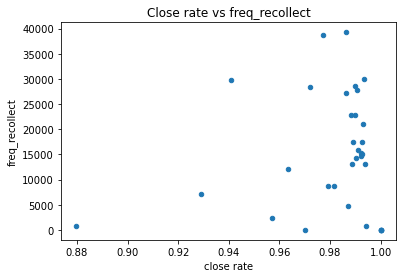

In [162]:
data.plot(kind='scatter',
    x='close rate',
    y='freq_recollect',
    title='Close rate vs freq_recollect')

<AxesSubplot:title={'center':'Close rate vs freq_trashday'}, xlabel='close rate', ylabel='freq_trashday'>

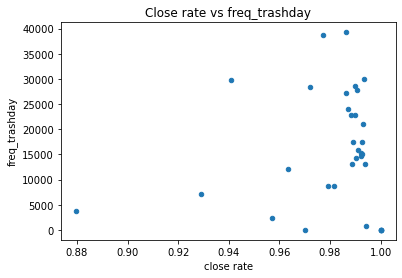

In [163]:
data.plot(kind='scatter',
    x='close rate',
    y='freq_trashday',
    title='Close rate vs freq_trashday')

<AxesSubplot:title={'center':'Case number vs freq_recollect'}, xlabel='case number', ylabel='freq_recollect'>

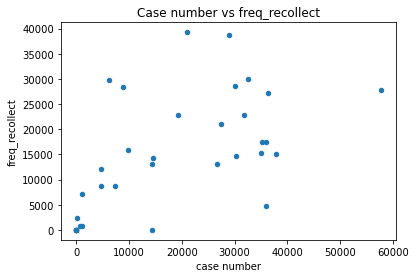

In [164]:
data.plot(kind='scatter',
    x='case number',
    y='freq_recollect',
    title='Case number vs freq_recollect')

<AxesSubplot:title={'center':'Case number vs freq_trashday'}, xlabel='case number', ylabel='freq_trashday'>

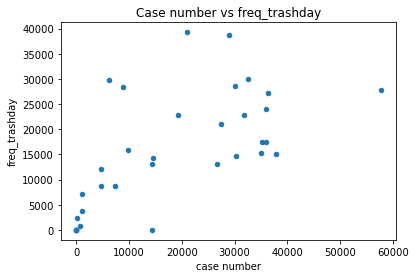

In [165]:
data.plot(kind='scatter',
    x='case number',
    y='freq_trashday',
    title='Case number vs freq_trashday')

2210.0 and 2110.0 are two communities that have low close rate but still not enough trash cleaning